## Kaggle assignment:
By Cooper Nederhood

#### DESCRIPTION:
This scipt calls a Kaggle dataset of New York City property sales from Sep 2016 to Sep 2017
It creates a bar chart of the average price per sq foot for a neighborhood, restricting to the top 10 neighborhoods by sale count. My cleaning of the missing values is probably inefficient, but I am currently learning more pandas funtionality. The 'path' variable below will have to be updated to reflect your local configuration


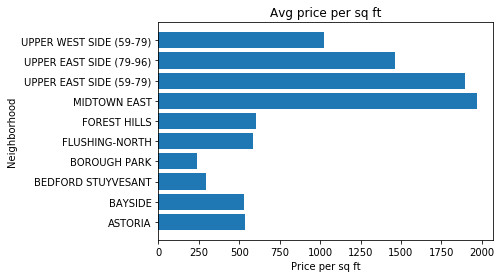

In [175]:
# Import initial packages
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


# Path to local directory file 
path = "C:/Users/Cooper/Documents/Kaggle_data/nyc_real_estate/nyc-rolling-sales.csv"
data = pd.read_csv(path, index_col = "NEIGHBORHOOD")

# Rename column names
new_names = []
for c in data.columns:
    s = c.replace(" ", "_")
    new_names.append(s)
data.columns = new_names

# Extract a subset of the data
subdata = data[['GROSS_SQUARE_FEET', 'SALE_PRICE']]

# Identify top 10 neighborhoods by sale counts
count = subdata.index.value_counts().sort_values(ascending = False)
top10 = count[0:10]

# Restrict to those top10 neighborhoods
top10_data = subdata.loc[top10.index]

# Drop missing values, which appear as a "-" character and change type to numeric
is_nonempty = top10_data[top10_data.SALE_PRICE != " -  "]
clean_data = is_nonempty[is_nonempty.GROSS_SQUARE_FEET != " -  "]
num_data = clean_data.astype('float', copy = False)

# Calculate price per sq foot, do further cleaning bc of zero values
price_sqft = num_data.SALE_PRICE / num_data.GROSS_SQUARE_FEET

clean_price_sqft = price_sqft.replace(np.inf, np.nan).dropna()

graph_series = clean_price_sqft.groupby("NEIGHBORHOOD").mean()
plt.barh(graph_series.index, graph_series)
plt.xlabel("Price per sq ft")
plt.ylabel("Neighborhood")
plt.title("Avg price per sq ft")
plt.show()